# Part 1 - Data collection

## Initial setup

In [ ]:
pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Import required libraries

import praw                       # To crawl Reddit and collect data
import pandas as pd               # To work with csv files
import matplotlib.pyplot as plt   # To plot graphs
import requests                   # To send POST requests
import time                       # To track time stamp of submissions
import pickle                     # To save and load the data we collect

In [ ]:
# Initialise a Reddit object using Praw. You're going to need to create an OAuth client to reproduce the results.
# To create a client: https://www.reddit.com/prefs/apps

# Enter your credentials here before proceeding
username = 'Researchapp'
password = 'Sheenand@13'
client_id = 'rPydyPFueGJFA5mQqeRWQg'
client_secret = 'VGJOQd8bysLQZX6HMrWIEgiVzZIlJg'
user_agent = "MyApp_1.0"
reddit = praw.Reddit(username=username,
                    password=password,
                    client_id=client_id,
                    client_secret=client_secret,
                    user_agent=user_agent)

## Initial crawl
To get an idea of the kind of data we're working with.

In [ ]:
# To store all the posts we're going to crawl
posts = []

# Create an object of the subreddit of interest, i.e. r/india
all_posts = reddit.subreddit('india').top(limit = None)

# Iterate over all the posts and add them to list
for post in all_posts:
    flair = post.link_flair_text
    if flair==None or flair.isascii()==False:
        continue
    posts.append([post.title, post.url, flair.strip().lower()])

# Store the result in a Pandas DataFrame
df = pd.DataFrame(posts, columns = ['title', 'url', 'flair'])
print(df.shape)
df.head(10)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

(986, 3)


,title,url,flair
0,'We've only been here a few hours and have see...,https://v.redd.it/dkjdc0upf2v61,coronavirus
1,Neeraj Chopra Creates History !! Wins India's ...,https://i.redd.it/s2gr6ionfxf71.jpg,sports
2,It's 2021 and India is still doing brown face ...,https://i.redd.it/35jwxnw4ae371.jpg,non-political
3,I won the Indian Cosplay Championship trophy a...,https://www.reddit.com/gallery/14aq44q,art/photo (oc)
4,My grandmother fought and beat COVID after bat...,https://i.redd.it/bceeyvekcgx61.jpg,coronavirus
5,Will donate thrice the number of upvotes (amou...,https://www.reddit.com/r/india/comments/981o7s...,[r]eddiquette
6,Fuck all Religion,https://www.reddit.com/r/india/comments/f9outu...,politics
7,Indian reply to NYtimes cartoon on Paris clima...,http://imgur.com/a/U48v9,/r/all
8,"The essence of the Indian soap opera, distille...",https://gfycat.com/DigitalSparseAkitainu,r/all
9,Lamborghini blocked by buffaloes in India,https://i.redd.it/ou46zzl19u451.jpg,non-political


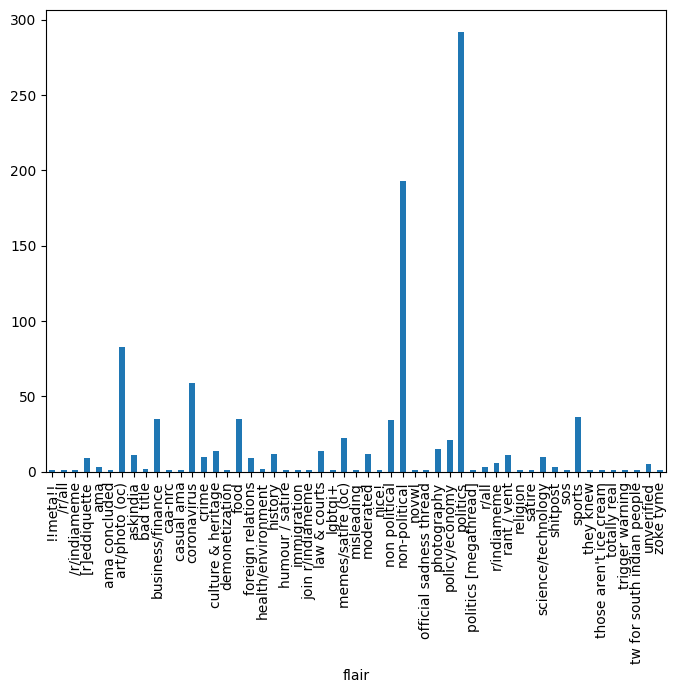

In [ ]:
# Plot a bar graph of the different flairs present

fig = plt.figure(figsize=(8,6))
df.groupby('flair').title.count().plot.bar(ylim=0)
plt.show()

Note that flairs such as 'goal achieved!!!' and 'on internet shutdowns' appear to be very infrequent and not follow any standard flair category listed on the subreddit's rule page. So we'll only work with the major flairs present.

## Crawling the appropriate data
One of the problems with the Praw API is that it only lets you access 1000 posts per request. To overcome this limitation, after every 1000 posts that we collect, we'll note the time stamp of the last post collected, and then collect the 1000 posts preceding that time, and so on.

In [ ]:
import datetime as dt
subreddit = reddit.subreddit('india')
flairs = ['AskIndia', 'Business/Finance', 'Food', 'Non-Political', 'Photography', 'Policy/Economy', 'Politics', 'Scheduled',
          'Science/Technology', 'Sports']

# Function to convert timestamp to datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [ ]:
topics_dict = {"id":[], "title":[], "flair":[]}

for submission in subreddit.top('year',limit = None):
    topics_dict["id"].append(submission.id)
    topics_dict["title"].append(submission.title)
    topics_dict["flair"].append(submission.link_flair_text)

data = pd.DataFrame(topics_dict)
data = data.loc[data.flair.isin(flairs)]
data.reset_index(drop=True, inplace=True)
data.tail()

<ipython-input-8-645e76311dc5>:3: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  for submission in subreddit.top('year',limit = None):
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.

,id,title,flair
461,134lcyr,"Sorry, No Data Available!",Politics
462,11hhtpm,Why do Indians fight like this ?,AskIndia
463,xpz0de,Central Government declares PFI (Popular Front...,Politics
464,12ag1cr,NCERT removes chapters on Mughals from their t...,Politics
465,120asr4,Official Censor Report of Bheed by CBFC. Thoug...,Politics


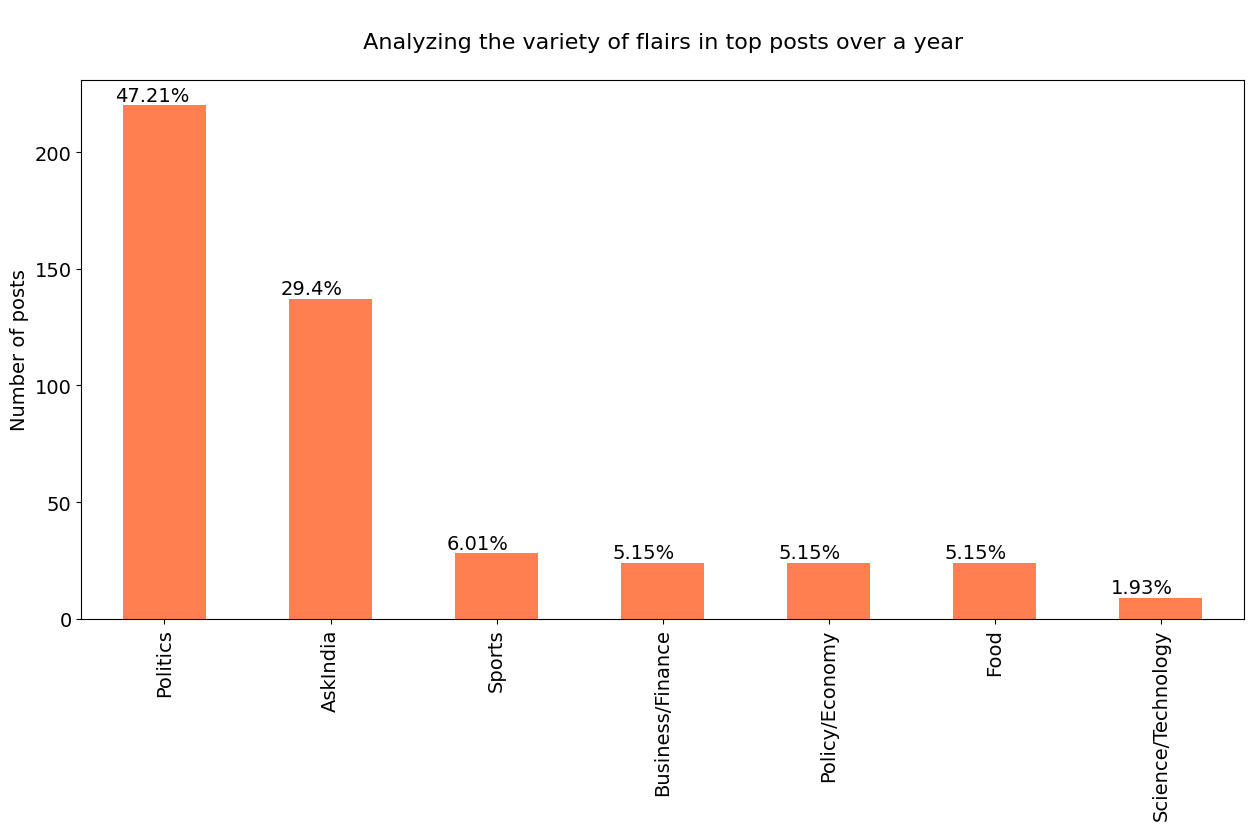

In [ ]:
import numpy as np
plot = data['flair'].value_counts().plot(kind='bar', figsize=(15,7), color="coral", fontsize=14);
plot.set_title("\n Analyzing the variety of flairs in top posts over a year \n", fontsize=16)
plot.set_ylabel("Number of posts", fontsize=14);

# Find the values and their sum
totals = []
for i in plot.patches:
    totals.append(i.get_height())
total = np.sum(totals)

# Set individual bar lables using above list
for i in plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    plot.text(i.get_x()-0.05, i.get_height()+ 2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)

In [ ]:
from tqdm import tqdm
import tldextract
import matplotlib.pyplot as plt
import time
topics_dict = {"id":[], "flair":[], "title":[], "body":[], "comments":[], "score":[], "author":[], "url":[], "domain":[], "comms_num": [], "created":[]}

# Using tqdm progress bar to track iterations
with tqdm(total=len(flairs)*250) as pbar:
    for flair in flairs:
        get_subreddits = subreddit.search(query = f"flair:{flair}", time_filter='year', limit=300)
        for submission in get_subreddits:
            topics_dict["flair"].append(submission.link_flair_text)
            topics_dict["title"].append(submission.title)
            topics_dict["score"].append(submission.score)
            topics_dict["id"].append(submission.id)
            topics_dict["url"].append(submission.url)
            topics_dict["comms_num"].append(submission.num_comments)
            topics_dict["created"].append(submission.created)
            topics_dict["body"].append(submission.selftext)
            topics_dict["author"].append(submission.author)


            # Using top-level-domain extraction methods to find domain of URLs
            tld = tldextract.extract(submission.url)
            d = tld.domain + "." + tld.suffix

            # Conditions for some exceptions
            if submission.is_self == True:
                d = "self-post"
            if d == "youtu.be":
                d = "youtube.com"
            if d == "redd.it":
                d = "reddit.com"

            topics_dict["domain"].append(d)

            submission.comments.replace_more(limit=100)
            comment = ' '
            for top_level_comment in submission.comments:
                comment += ' ' + top_level_comment.body
            topics_dict["comments"].append(comment)
            pbar.update(1)

            time.sleep(2)

            pbar.update(1)


  0%|          | 0/2500 [00:00<?, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more inf

KeyboardInterrupt: ignored

In [ ]:
data = pd.DataFrame(topics_dict)

# Converting timestamp to datetime format
_timestamp = data["created"].apply(get_date)
data = data.assign(timestamp = _timestamp)
del data['created']

# Shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)

# Saving the data in csv file
data.to_csv('reddit-india-data.csv', index=False)
data.tail()

ValueError: ignored

## Filtering the data

It takes several minutes to run the previous block. I ran it once and saved the result in a Pickle file. We'll load that and proceed.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
%run cleaning.py

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cleaning
from nltk import word_tokenize
from nltk.util import ngrams
from heapq import nlargest
import collections
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
import pickle

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data = pd.read_csv('reddit-india-data.csv', parse_dates=['timestamp'])
data.body.fillna('', inplace=True)
data.tail()

,id,flair,title,body,comments,score,author,url,domain,comms_num,timestamp
1819,13uu76w,Policy/Economy,"Free Speech, Meet Confidentiality: The Blockin...",&#x200B;\n\n[ ](https://preview.redd.it/l3bhxl...,,126,InternetFreedomIn,https://www.reddit.com/r/india/comments/13uu76...,self-post,4,2023-05-29 12:57:51
1820,11t0gty,AskIndia,India at #191 with 3.04% of people with Anxiet...,,* If your image is not OC (Original Content)...,2214,anubhav316,https://i.redd.it/3hmj0jj1g6oa1.jpg,reddit.com,608,2023-03-16 17:26:04
1821,159xw13,Policy/Economy,[OLD] Nine years of Modi government: What Indi...,Modi government has changed India and mostly f...,"To be honest, he is a Vishwaguru, so he can ...",1,Time_Comfortable8644,https://m.economictimes.com/news/economy/polic...,economictimes.com,2,2023-07-26 06:41:21
1822,1598az5,Politics,6 years and counting: No justice for kin of te...,,"## Irom Roger, 19, was murdered by Manipur C...",386,Pale_Rest2423,https://www.indiatoday.in/mail-today/story/man...,indiatoday.in,15,2023-07-25 13:17:44
1823,10zd5cv,Food,Man finds rat inside packet of bread delivered...,,How can the delivery guy or someone in the p...,177,Accomplished-Fly1003,https://www.indiatoday.in/trending-news/story/...,indiatoday.in,35,2023-02-11 05:24:48


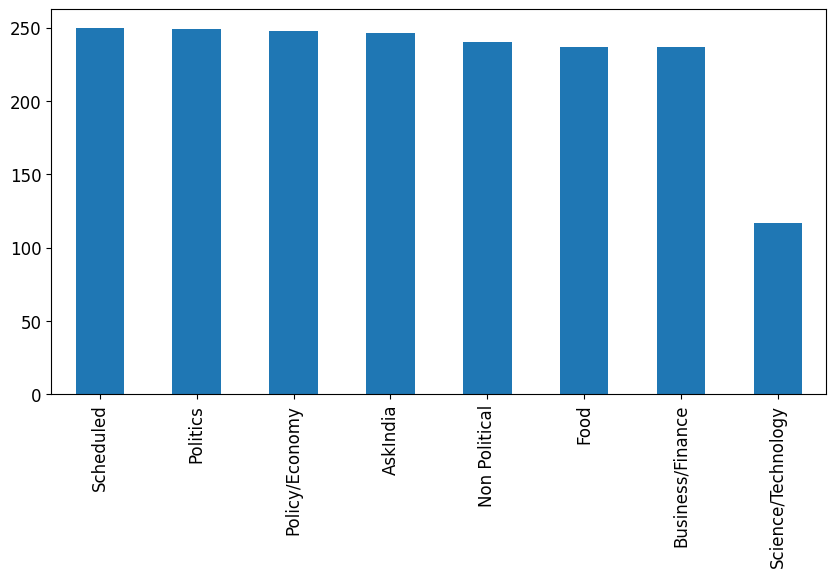

In [ ]:
flairs = ['AskIndia', 'Business/Finance', 'Food', 'Non-Political', 'Photography', 'Policy/Economy', 'Politics', 'Scheduled',
          'Science/Technology', 'Sports']

# Merging megathreads into respective flairs
for flr in flairs:
    data.flair[data.flair == flr +' [Megathread]'] = flr

plt.figure(figsize=(10,5))
data.flair.value_counts().plot(kind='bar', fontsize=12);

In [ ]:
cleaning.clean_text(data, 'title')
cleaning.clean_text(data, 'body')
cleaning.clean_text(data, 'comments')

Cleaning text of title ...
DONE! 

Cleaning text of body ...
DONE! 

Cleaning text of comments ...
DONE! 



In [ ]:
data['content'] = data.title +' '+ data.body +' '+ data.comments +' '+ data.domain

X = data.content
y = data.flair

# Label encoding the classes (alphabetically by default)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# Finding top ngrams in each flair
top_num = 10

for flair in flairs:
    all_text = ' '.join(str(word) for word in data.content[data.flair == flair].values)
    tokens = word_tokenize(all_text)

    unigrams = ngrams(tokens, 1)
    unigrams = collections.Counter(unigrams).most_common(top_num)
    unigrams = [item[0][0] for item in unigrams]

    bigrams = ngrams(tokens, 2)
    bigrams = collections.Counter(bigrams).most_common(top_num)
    bigrams = [item[0][0]+' '+item[0][1] for item in bigrams]

    print(f"> {flair} \nUnigrams: {unigrams} \nBigrams: {bigrams} \n")

> AskIndia 
Unigrams: ['what', 'india', 'make', 'indian', 'time', 'work', 'life', 'year', 'post', 'should'] 
Bigrams: ['bot action', 'action perform', 'perform automatically', 'automatically contact', 'contact moderator', 'moderator subredditmessagecomposetorindia', 'subredditmessagecomposetorindia question', 'question concern', 'unpopular opinion', 'title should'] 

> Business/Finance 
Unigrams: ['company', 'india', 'adani', 'money', 'make', 'what', 'pay', 'buy', 'time', 'year'] 
Bigrams: ['bot action', 'action perform', 'perform automatically', 'automatically contact', 'contact moderator', 'moderator subredditmessagecomposetorindia', 'subredditmessagecomposetorindia question', 'question concern', 'adani group', 'post title'] 

> Food 
Unigrams: ['food', 'make', 'indian', 'eat', 'india', 'taste', 'what', 'chicken', 'post', 'restaurant'] 
Bigrams: ['provide link', 'bot action', 'action perform', 'perform automatically', 'automatically contact', 'contact moderator', 'moderator subreddit

In [ ]:
# Splitting data into train:test by 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print("Distribution of classes in test set: \n", np.bincount(y_test))

# Creating the vectorizer
tfidf = TfidfVectorizer(max_features = 5000, ngram_range=(1,3), min_df=5, max_df=0.9, stop_words=cleaning.STOPWORDS )
tfidf = tfidf.fit(X_train)

# Saving the vectorizer as pickle file
with open("vectorizer.pkl", 'wb') as file:
    pickle.dump(tfidf, file)

X_train = tfidf.transform(X_train).toarray()
print('\nTraining features shape: ',X_train.shape)

X_test = tfidf.transform(X_test).toarray()
print('Test features shape:     ',X_test.shape)

Distribution of classes in test set: 
 [42 39 36 61 47 61 61 18]

Training features shape:  (1459, 5000)
Test features shape:      (365, 5000)


In [ ]:
def train_classifier(model, train_data, train_labels, test_data, test_labels):
    model.fit(train_data, train_labels)
    prediction = model.predict(test_data)
    acc = round(accuracy_score(prediction, test_labels)*100, 0)
    print(f'ACCURACY = {acc} %')
    return acc, model

# Creating dictionary to record accuracy of each model
accuracies = {}

In [ ]:
models = {'RandomForestClassifier': RandomForestClassifier(),
          'LinearSVC': LinearSVC(),
          'MultinomialNB': MultinomialNB(),
          'LogisticRegression': LogisticRegression(),
          'SGDClassifier': SGDClassifier()}

# The metrics that we'll use
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_macro': make_scorer(f1_score, average='macro')}

In [ ]:
results = []
for name, model in models.items():

  # Cross validate with k = 5
  crossval = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)

  # Get the metrics
  accuracy = np.average(crossval['test_accuracy'])
  f1 = np.average(crossval['test_f1_macro'])
  precision = np.average(crossval['test_precision'])
  recall = np.average(crossval['test_recall'])
  results.append([name, accuracy, f1, precision, recall])

In [ ]:
results = pd.DataFrame(results, columns = ['model', 'accuracy', 'f1 score', 'precision', 'recall'])
results

,model,accuracy,f1 score,precision,recall
0,RandomForestClassifier,0.581206,0.514906,0.548467,0.542715
1,LinearSVC,0.651144,0.625598,0.635348,0.629728
2,MultinomialNB,0.594231,0.518967,0.558041,0.554478
3,LogisticRegression,0.648390,0.600829,0.666153,0.612369
4,SGDClassifier,0.612752,0.591730,0.615404,0.591194


In [ ]:
from sklearn.svm import SVC
classifier = SVC(C = 2.5, kernel = 'linear', gamma='scale', random_state=42)
accuracies['Linear SVM'], svm = train_classifier(classifier, X_train, y_train, X_test, y_test)

ACCURACY = 65.0 %


In [ ]:
y_pred = svm.predict(X_test)
print("\nSVM Classifier results: \n")
print(classification_report(y_test, y_pred, target_names = list(encoder.classes_)))


SVM Classifier results: 

                    precision    recall  f1-score   support

          AskIndia       0.42      0.57      0.48        42
  Business/Finance       0.47      0.54      0.50        39
              Food       0.67      0.78      0.72        36
     Non Political       0.52      0.48      0.50        61
    Policy/Economy       0.55      0.47      0.51        47
          Politics       0.85      0.74      0.79        61
         Scheduled       1.00      1.00      1.00        61
Science/Technology       0.73      0.44      0.55        18

          accuracy                           0.65       365
         macro avg       0.65      0.63      0.63       365
      weighted avg       0.67      0.65      0.65       365



## **DATA VISUALIZATION**

                         score       
                          mean median
flair                                
AskIndia            244.585366   63.0
Business/Finance    207.000000   34.0
Food                246.995781   18.0
Non Political       547.287500  189.5
Policy/Economy      143.092742   28.0
Politics            609.646586  356.0
Scheduled             7.492000    6.0
Science/Technology  203.547009   19.0


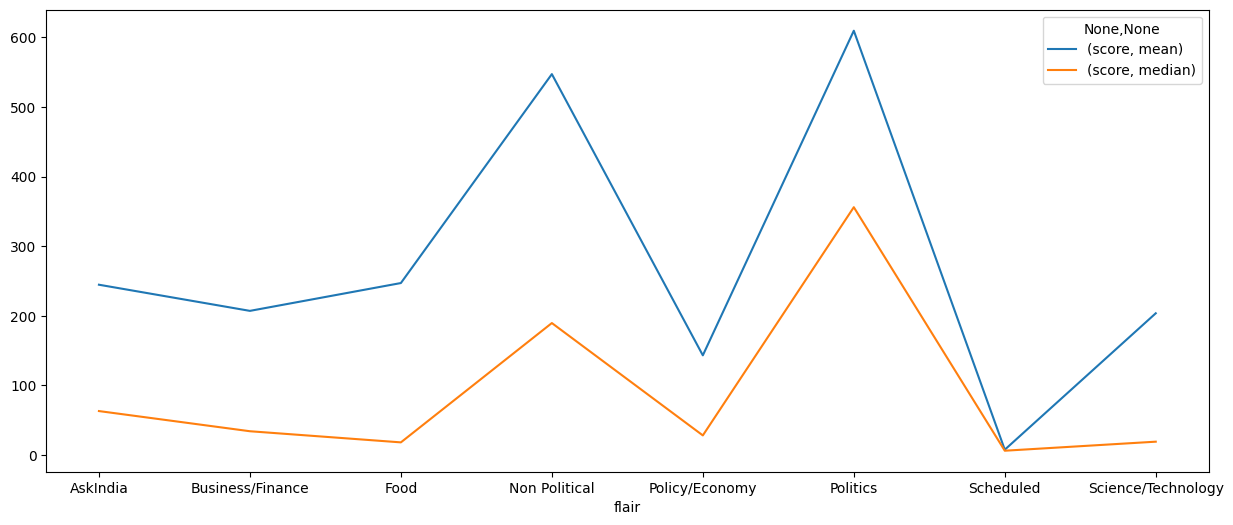

In [ ]:
pivot = data.pivot_table(index=['flair'], values=['score'], aggfunc={'median','mean'})
print(pivot)
pivot.plot(figsize=(15,6))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Reddit/reddit-india-data.csv')
df.head()

,id,flair,title,body,comments,score,author,url,domain,comms_num,timestamp
0,13qminh,Policy/Economy,India GDP crosses $3.5 tn in 2022; bureaucracy...,NaN,Cant even do recurring payments or internati...,21,Acrobatic_Effect4907,https://economictimes.indiatimes.com/news/econ...,indiatimes.com,8,2023-05-24 13:58:29
1,11xdd9j,Food,"Maharashtra To Madhya Pradesh, Crops Destroyed...",NaN,,10,VCardBGone,https://www.ndtv.com/india-news/unseasonal-rai...,ndtv.com,0,2023-03-21 10:51:21
2,14pkrw4,AskIndia,I shouted at my father.,This happened 2days ago and I am still regrett...,* Your post title should be an accurate summ...,34,Abydaby007,https://www.reddit.com/r/india/comments/14pkrw...,self-post,30,2023-07-03 14:34:59
3,12qnt93,Business/Finance,UPI Most Preferred Mode for Digital Payments i...,NaN,UPI is pathbreaking to some extent. It has m...,61,VCardBGone,https://www.gadgets360.com/apps/news/upi-debit...,gadgets360.com,10,2023-04-18 13:53:17
4,139ldch,Food,how chips companies looting people { to aware ...,NaN,* If your image is not OC (Original Content)...,147,ajjuee016,https://www.reddit.com/gallery/139ldch,reddit.com,75,2023-05-06 12:19:10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


No of words in title vs No. of posts

Text(0, 0.5, 'Number of posts')

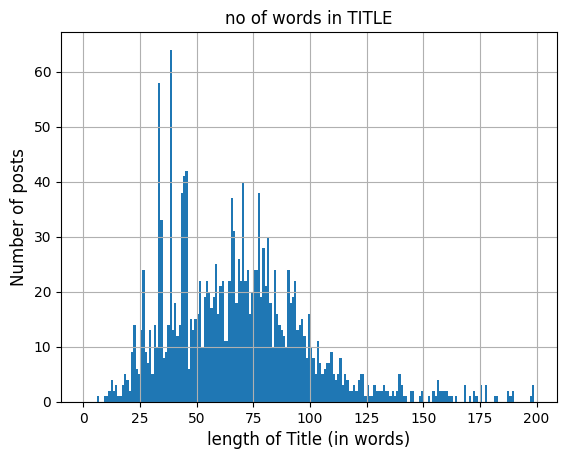

In [ ]:
temp = df.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)

No. of comments in time

Text(0, 0.5, 'Number of comments')

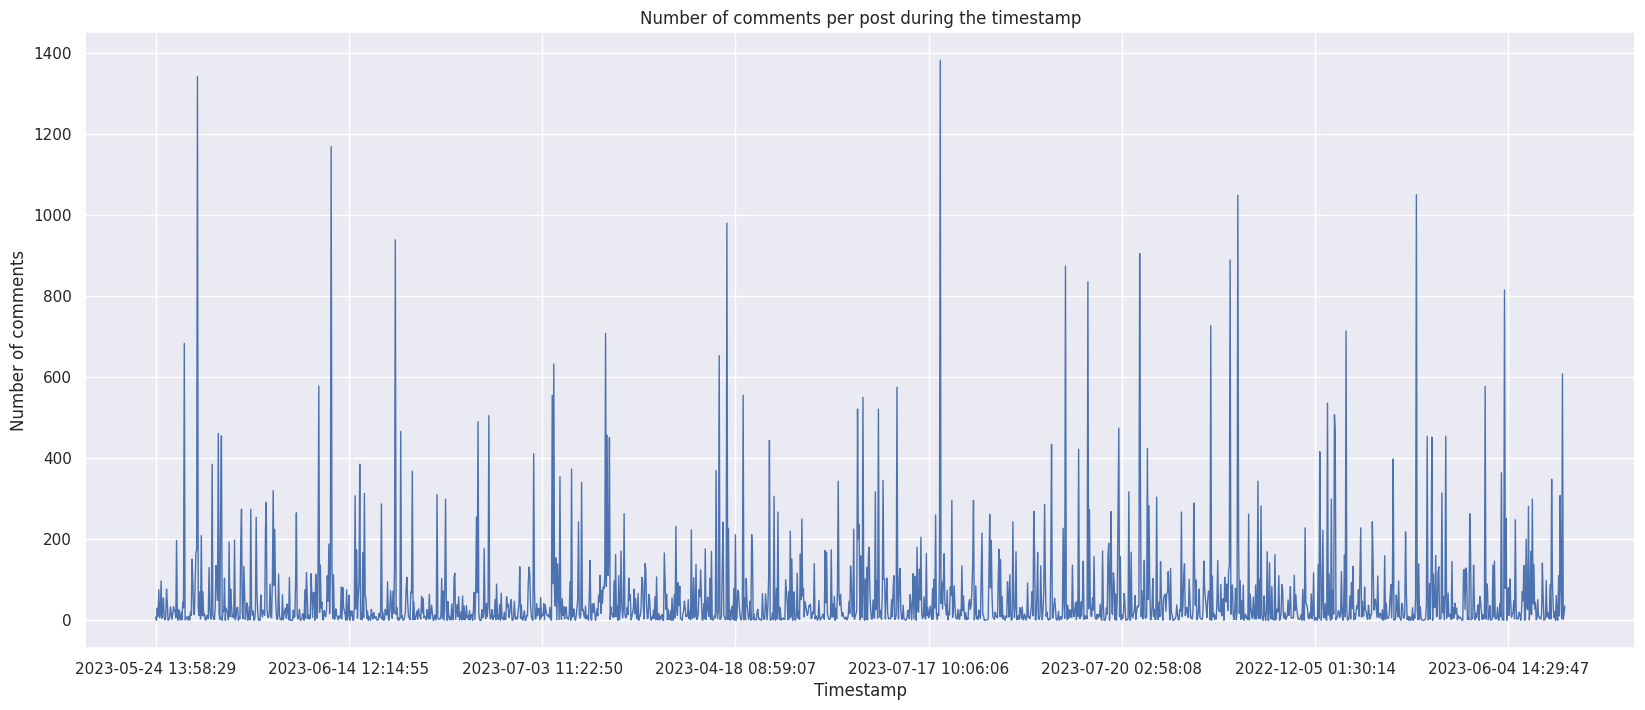

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 8)})

df['comms_num'].plot(linewidth=1);


plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")

Average Number of comments per post

<ipython-input-18-338e47bfd110>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.groupby("flair").mean()[['comms_num']]


,comms_num
flair,
AskIndia,121.853659
Business/Finance,37.168776
Food,54.856540
Non Political,95.508333
Policy/Economy,21.822581
Politics,84.895582
Scheduled,8.800000
Science/Technology,33.538462


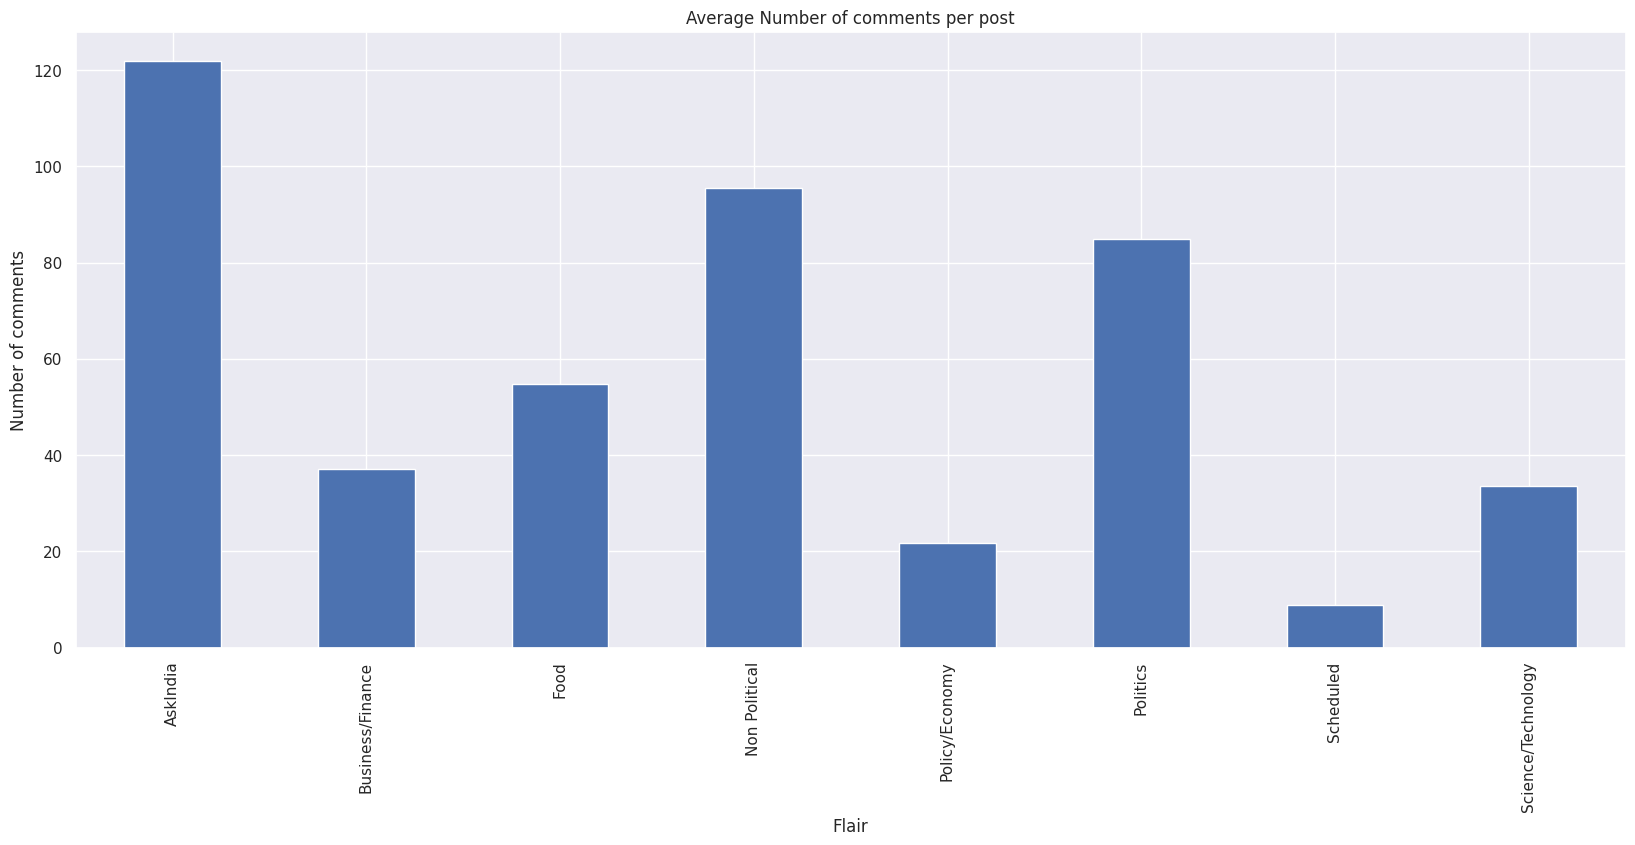

In [ ]:
df3 = df.groupby("flair").mean()[['comms_num']]

df3.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Number of comments")


df3.head(10)


In [ ]:
df.body.fillna(" ",inplace=True)

TF-IDF Plot of different categories of flair

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


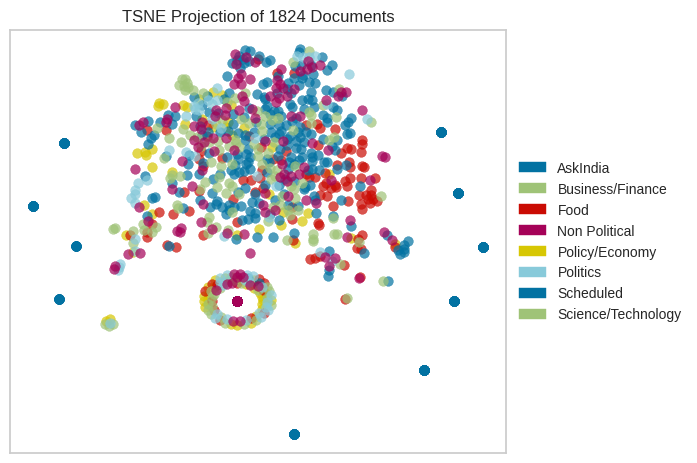

<Axes: title={'center': 'TSNE Projection of 1824 Documents'}>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.body)
y = df.flair

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()